In [11]:
library(httr)

In [13]:
(token <- readRDS("token.rds"))

<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> data_sci_8001
  key:    nImVTaVIeo6tYlKnwYgxPRquQ
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret, user_id, screen_name, x_auth_expires
---

In [15]:
path_to_token <- normalizePath("token.rds")

path_to_token

[1] "C:\\Users\\Jacky Zhao\\Desktop\\repos\\R-Data\\token.rds"

In [17]:
envvar <- paste0("TWITTER_PAT=", path_to_token)

envvar

[1] "TWITTER_PAT=C:\\Users\\Jacky Zhao\\Desktop\\repos\\R-Data\\token.rds"

In [19]:
cat(envvar, file = "~/.Renviron", fill = TRUE, append = TRUE)

In [21]:
(readRenviron("~/.Renviron"))

[1] TRUE

In [23]:
## load token function
load_twitter_token <- function() {
    ## your function code goes here
    return(readRDS(path_to_token))
    
}

## load token
token <- load_twitter_token()

## print token
token

<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> data_sci_8001
  key:    nImVTaVIeo6tYlKnwYgxPRquQ
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret, user_id, screen_name, x_auth_expires
---

In [24]:
## write function to query users/search API
search_tweeps <- function(q, page = NULL,
                           count = 100, 
                           include_entities = TRUE) {
    ## URL scheme and hostname
    base_url <- "https://api.twitter.com"
    ## include the API version number as part of the path
    path <- "1.1/users/search.json"
    ## continue function code here
    
    params <- list(
        q = q,
        page = page,
        count = count,
        include_entities = include_entities
    )
    
    response <- httr::GET(base_url, path = path, query = params, 
                httr::config(token = load_twitter_token()))  
    
    
    print(paste("Response Code: ", response$status_code))
    
    return(response)
    
}

In [25]:
## test function
usr <- search_tweeps("rstats")

[1] "Response Code:  200"


In [26]:
## show (print) that usr's status code == 200
usr

print(paste("Response Code: ", usr$status_code))

Response [https://api.twitter.com/1.1/users/search.json?q=rstats&count=100&include_entities=TRUE]
  Date: 2018-01-29 00:21
  Status: 200
  Content-Type: application/json;charset=utf-8
  Size: 63 kB


[1] "Response Code:  200"


In [27]:

response2list <- function(x) {
    ## your function code goes in here
    responseContent <-  httr::content(x, as = "text", encoding = "UTF-8")
    responseJson <- jsonlite::fromJSON(responseContent)
    return(responseJson)    
}

In [28]:
usr <- response2list(usr)

In [29]:
str(usr, 2)

'data.frame':	20 obs. of  43 variables:
 $ id                                : num  1.09e+07 2.97e+09 2.54e+08 4.41e+09 3.42e+08 ...
 $ id_str                            : chr  "10915042" "2973406683" "253791979" "4406202856" ...
 $ name                              : chr  "Sharon Machlis" "Mike Kearney<f0><U+009F><U+0093><U+008A>" "Dean Attali" "Joyce Robbins" ...
 $ screen_name                       : chr  "sharon000" "kearneymw" "daattali" "jtrnyc" ...
 $ location                          : chr  "" "Columbia, MO" "Toronto" "New York, NY" ...
 $ description                       : chr  "Director, editorial data & analytics, IDG. A bit #rstats obsessed." "Assistant Professor at @mujschool and MU Informatics Institute. Interested in new media, partisanship, data jou"| __truncated__ "Founder & Lead R-Shiny Consultant @ AttaliTech Ltd.\n\n#rstats blogger, tool builder, extreme traveller. MSc in"| __truncated__ "Data visualization and stories, Lecturer, Dept of Statistics, Columbia U #rst

In [30]:
usr_atomic <- usr[, sapply(usr, is.atomic)]
head(usr_atomic, 6)

id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,...,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
10915042,10915042,Sharon Machlis,sharon000,,"Director, editorial data & analytics, IDG. A bit #rstats obsessed.",https://t.co/TTtBZRGP8q,FALSE,5407,728,...,DDFFCC,333333,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,none
2973406683,2973406683,Mike Kearney<f0><U+009F><U+0093><U+008A>,kearneymw,"Columbia, MO","Assistant Professor at @mujschool and MU Informatics Institute. Interested in new media, partisanship, data journalism, data[[""big""]] science, and #rstats.",https://t.co/wBaqsHTMcW,FALSE,3256,859,...,DDEEF6,333333,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,none
253791979,253791979,Dean Attali,daattali,Toronto,"Founder & Lead R-Shiny Consultant @ AttaliTech Ltd. #rstats blogger, tool builder, extreme traveller. MSc in Bioinformatics, Bachelor of Computer Science.",https://t.co/thlIsXJa95,FALSE,2786,52,...,DDEEF6,333333,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,none
4406202856,4406202856,Joyce Robbins,jtrnyc,"New York, NY","Data visualization and stories, Lecturer, Dept of Statistics, Columbia U #rstats",https://t.co/SqsH63OVW9,FALSE,452,260,...,DDEEF6,333333,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,none
342250615,342250615,rOpenSci,rOpenSci,"Berkeley, Portland, Kamloops, Utrecht","rOpenSci develops #rstats-based tools to facilitate open science and access to open data. Tweets by @sckottie, @_inundata, @StefanieButland, @opencpu",https://t.co/Ijujhl8x1E,FALSE,16802,507,...,DDEEF6,333333,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,none
295344317,295344317,One R Tip a Day,RLangTip,,One tip per day M-F on the R programming language #rstats. Brought to you by the R community team at Microsoft.,NA,FALSE,49164,11,...,FFFFFF,333333,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,none


In [31]:
usr_recurs <- usr[, sapply(usr, is.recursive)]
str(usr_recurs, 2)

'data.frame':	20 obs. of  2 variables:
 $ entities:'data.frame':	20 obs. of  2 variables:
  ..$ url        :'data.frame':	20 obs. of  1 variable:
  ..$ description:'data.frame':	20 obs. of  1 variable:
 $ status  :'data.frame':	20 obs. of  27 variables:
  ..$ created_at               : chr  "Sun Jan 28 16:06:50 +0000 2018" "Sun Jan 28 17:48:49 +0000 2018" "Sun Jan 28 18:24:47 +0000 2018" "Sun Jan 28 17:08:33 +0000 2018" ...
  ..$ id                       : num  9.58e+17 9.58e+17 9.58e+17 9.58e+17 9.57e+17 ...
  ..$ id_str                   : chr  "957646157391519744" "957671820328620033" "957680871372349440" "957661688588898304" ...
  ..$ text                     : chr  "@hspter @dataandme So true. Probably my most popular R article for Computerworld is the Beginner's Guide.  It s"| __truncated__ "@robinson_es I can't explain how excited I am to see this make the slides!!! https://t.co/Xrs9hzQ6Uj" "@yoniceedee hahaha you don't need to understand any spoken language to laugh at that" "@

In [32]:
names(usr_atomic)

[1] "id"                                 "id_str"                            
 [3] "name"                               "screen_name"                       
 [5] "location"                           "description"                       
 [7] "url"                                "protected"                         
 [9] "followers_count"                    "friends_count"                     
[11] "listed_count"                       "created_at"                        
[13] "favourites_count"                   "utc_offset"                        
[15] "time_zone"                          "geo_enabled"                       
[17] "verified"                           "statuses_count"                    
[19] "lang"                               "contributors_enabled"              
[21] "is_translator"                      "is_translation_enabled"            
[23] "profile_background_color"           "profile_background_image_url"      
[25] "profile_background_image_url_https" "profile_background_tile"           
[27] "profile_image_url"                  "profile_image_url_https"           
[29] "profile_banner_url"                 "profile_link_color"                
[31] "profile_sidebar_border_color"       "profile_sidebar_fill_color"        
[33] "profile_text_color"                 "profile_use_background_image"      
[35] "has_extended_profile"               "default_profile"                   
[37] "default_profile_image"              "following"                         
[39] "follow_request_sent"                "notifications"                     
[41] "translator_type"

In [33]:
## function for converting characters to date times
convert2posixct <- function(x) {
    as.POSIXct(x, format = "%a %b %d %T %z %Y")
}

## convert to posixct and add status created_at as new variable named `last_tweet`
usr_atomic$last_tweet <- convert2posixct(usr_atomic$created_at)
head(usr_atomic, 3)

id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,...,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,last_tweet
10915042,10915042,Sharon Machlis,sharon000,,"Director, editorial data & analytics, IDG. A bit #rstats obsessed.",https://t.co/TTtBZRGP8q,FALSE,5407,728,...,333333,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,none,2007-12-06 14:46:28
2973406683,2973406683,Mike Kearney<f0><U+009F><U+0093><U+008A>,kearneymw,"Columbia, MO","Assistant Professor at @mujschool and MU Informatics Institute. Interested in new media, partisanship, data journalism, data[[""big""]] science, and #rstats.",https://t.co/wBaqsHTMcW,FALSE,3256,859,...,333333,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,none,2015-01-11 11:54:09
253791979,253791979,Dean Attali,daattali,Toronto,"Founder & Lead R-Shiny Consultant @ AttaliTech Ltd. #rstats blogger, tool builder, extreme traveller. MSc in Bioinformatics, Bachelor of Computer Science.",https://t.co/thlIsXJa95,FALSE,2786,52,...,333333,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,none,2011-02-17 17:58:19


In [34]:
## convert created_at to class date-time
usr_atomic$created_at <- convert2posixct(usr_atomic$created_at)

## create `weeks_joined` variable and add it to `usr_atomic`
usr_atomic$weeks_joined <- as.numeric(Sys.time() - usr_atomic$created_at)/7

head(usr_atomic, 3)

id,id_str,name,screen_name,location,description,url,protected,followers_count,friends_count,...,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type,last_tweet,weeks_joined
10915042,10915042,Sharon Machlis,sharon000,,"Director, editorial data & analytics, IDG. A bit #rstats obsessed.",https://t.co/TTtBZRGP8q,FALSE,5407,728,...,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,none,2007-12-06 14:46:28,529.4500
2973406683,2973406683,Mike Kearney<f0><U+009F><U+0093><U+008A>,kearneymw,"Columbia, MO","Assistant Professor at @mujschool and MU Informatics Institute. Interested in new media, partisanship, data journalism, data[[""big""]] science, and #rstats.",https://t.co/wBaqsHTMcW,FALSE,3256,859,...,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,none,2015-01-11 11:54:09,159.0385
253791979,253791979,Dean Attali,daattali,Toronto,"Founder & Lead R-Shiny Consultant @ AttaliTech Ltd. #rstats blogger, tool builder, extreme traveller. MSc in Bioinformatics, Bachelor of Computer Science.",https://t.co/thlIsXJa95,FALSE,2786,52,...,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,none,2011-02-17 17:58:19,362.4310


In [37]:
## load the tidyverse packages (dplyr, tidyr, ggplot2)
library(tidyverse)

In [38]:
## wrangle and plot using `geom_density()`

interestedColumns <- usr_atomic %>%
                        select(statuses_count, friends_count, followers_count)


head(interestedColumns, 6)

statuses_count,friends_count,followers_count
10429,728,5407
3176,859,3256
2337,52,2786
800,260,452
3931,507,16802
1822,11,49164


In [39]:
formattedData <- gather(interestedColumns, "Categories", "Numbers", 1:3)
head(formattedData)

Categories,Numbers
statuses_count,10429
statuses_count,3176
statuses_count,2337
statuses_count,800
statuses_count,3931
statuses_count,1822


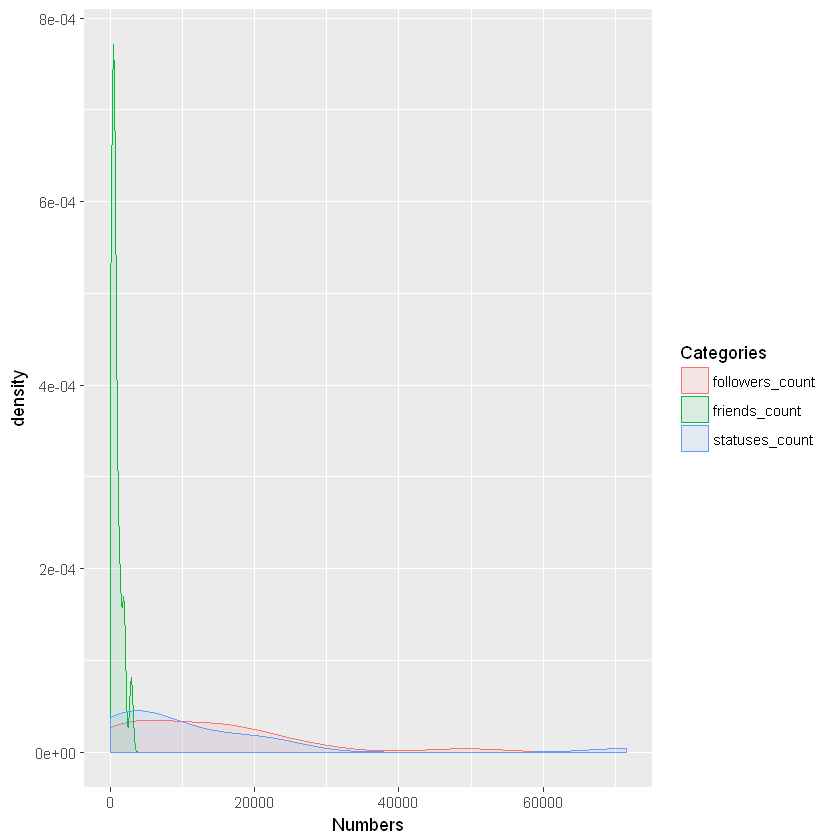

In [40]:
ggplot(formattedData, aes(x = Numbers)) + 
            geom_density(aes(group = Categories, color = Categories, fill = Categories), alpha = 0.1)

In [41]:
head(formattedData)

Categories,Numbers
statuses_count,10429
statuses_count,3176
statuses_count,2337
statuses_count,800
statuses_count,3931
statuses_count,1822


In [42]:
formattedData$loggedNumbers <- log(formattedData$Numbers)
head(formattedData)

Categories,Numbers,loggedNumbers
statuses_count,10429,9.252346
statuses_count,3176,8.063378
statuses_count,2337,7.756623
statuses_count,800,6.684612
statuses_count,3931,8.276649
statuses_count,1822,7.507690


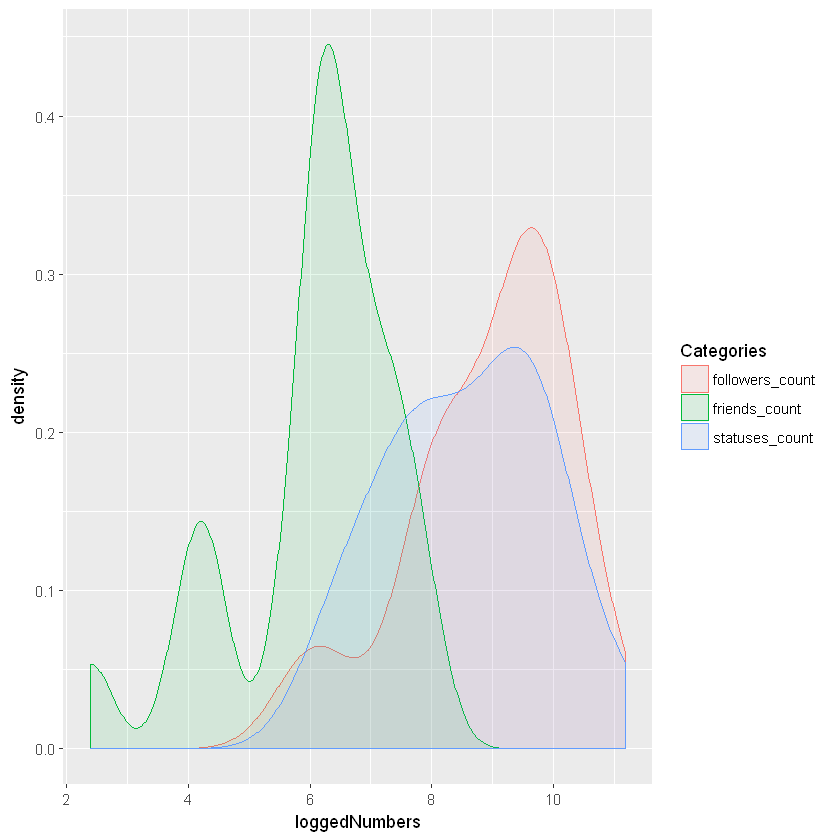

In [43]:
ggplot(formattedData, aes(x = loggedNumbers)) + 
            geom_density(aes(group = Categories, color = Categories, fill = Categories), alpha = 0.1)

In [45]:
lm <- glm(statuses_count ~ followers_count + friends_count + verified + weeks_joined,
                      usr_atomic, 
                      family = poisson)

summary(lm)


Call:
glm(formula = statuses_count ~ followers_count + friends_count + 
    verified + weeks_joined, family = poisson, data = usr_atomic)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-244.85   -80.53   -11.37    31.90   232.15  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     6.944e+00  1.131e-02  613.92   <2e-16 ***
followers_count 1.613e-05  2.275e-07   70.91   <2e-16 ***
friends_count   5.550e-04  2.960e-06  187.52   <2e-16 ***
verifiedTRUE    7.257e-01  5.160e-03  140.64   <2e-16 ***
weeks_joined    3.787e-03  2.014e-05  188.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 291023  on 19  degrees of freedom
Residual deviance: 179498  on 15  degrees of freedom
AIC: 179717

Number of Fisher Scoring iterations: 6
